In [2]:
import sys
#############################################
import warnings
warnings.filterwarnings("ignore")
#############################################
sys.path.insert(1, '/media/BINGODATA1/ComponentSeparation/beam_analyzes/scripts')
import handling_data          as hdata

In [5]:
## Prior = HI + FG + PL


output_info = {"pathdir_HI" :'/media/BINGODATA1/ComponentSeparation/building_dataset/dataset/HI256',
               "pathdir_N"  :'/media/BINGODATA1/ComponentSeparation/building_dataset/dataset/WN256',
               "realization": 'all',
               "pathdir_FG" :'/media/BINGODATA1/ComponentSeparation/building_dataset/dataset/FG256',
               "nameFG"     : None,
               "pathdir_PL" : None, #'/media/BINGODATA1/ComponentSeparation/building_dataset/dataset/PL256',
               "namePL"     : None,
               "apply_mask" : True,
               "pathdir_M"  :'/media/BINGODATA1/ComponentSeparation/building_dataset/dataset/M256',
               "nameM"      :'mask_256_5degC2apod_20fgcut.fits',
               "apply_beam" : True, 
               "type_beam"    :'gaussian',
               "type_fwhm"    :'fixed',
               "if_fwhm_fixed": 0.667,
               "main_dish_diameter": 40,
               "lmax"       : None,
               "theta_range": None,
               'new_nside'  : 256,
               'output_dir' :'/media/BINGODATA1/ComponentSeparation/building_dataset/dataset_processed/PRIOR256',
               'clear_output_dir': True,
               'first_name' :'Prior',
               'add_info'   :'2eQ_1eU_priorWNPL',
               'pl_position': 0
              }

In [6]:
hdata.save_FITS_newformat_observed(output_info)

Checking output directory...
Output directory ready.

Changing dimensions...
Realizations to be saved: ['0001' '0002' '0003' '0004' '0005' '0006' '0007' '0008' '0009' '0010'
 '0011' '0012' '0013' '0014' '0015' '0016' '0017' '0018' '0019' '0020'
 '0021' '0022' '0023' '0024' '0025' '0026' '0027' '0028' '0029' '0030'
 '0031' '0032' '0033' '0034' '0035' '0036' '0037' '0038' '0039' '0040'
 '0041' '0042' '0043' '0044' '0045' '0046' '0047' '0048' '0049' '0050'
 '0051' '0052' '0053' '0054' '0055' '0056' '0057' '0058' '0059' '0060'
 '0061' '0062' '0063' '0064' '0065' '0066' '0067' '0068' '0069' '0070'
 '0071' '0072' '0073' '0074' '0075' '0076' '0077' '0078' '0079' '0080'
 '0081' '0082' '0083' '0084' '0085' '0086' '0087' '0088' '0089' '0090'
 '0091' '0092' '0093' '0094' '0095' '0096' '0097' '0098' '0099' '0100']


Building maps of L0001...
Saving the file...
Saving in /media/BINGODATA1/ComponentSeparation/building_dataset/dataset_processed/PRIOR256/Prior_I_256_980mhz1260mhz_30bins_partial_40arcm

## ---------

In [7]:
import healpy as hp
import healpy.newvisufunc as hpn
import astropy.io.fits as fits
import numpy as np
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
from   IPython.display import clear_output
from matplotlib import cm
from matplotlib import rc
from copy import deepcopy as dcopy

In [20]:
filename = 'Prior_I_256_980mhz1260mhz_30bins_partial_23arcmin_rippleGbeam_2eQ_1eU_priorWNPL_L0001.fits'
imap = hdata.getmap(dirpath_=output_info['output_dir'], filename_=filename, healpix_readingformat=False, hdu=1)

In [23]:
mask = hdata.getmap(dirpath_ =output_info['pathdir_M'], 
                    filename_=output_info['nameM'], 
                    healpix_readingformat=False, hdu=1)

$T_{\textrm{prior}} = B \ast \left(T_{\textrm{HI}} + T_{\textrm{PL}}\right) + T_{\textrm{N}}$

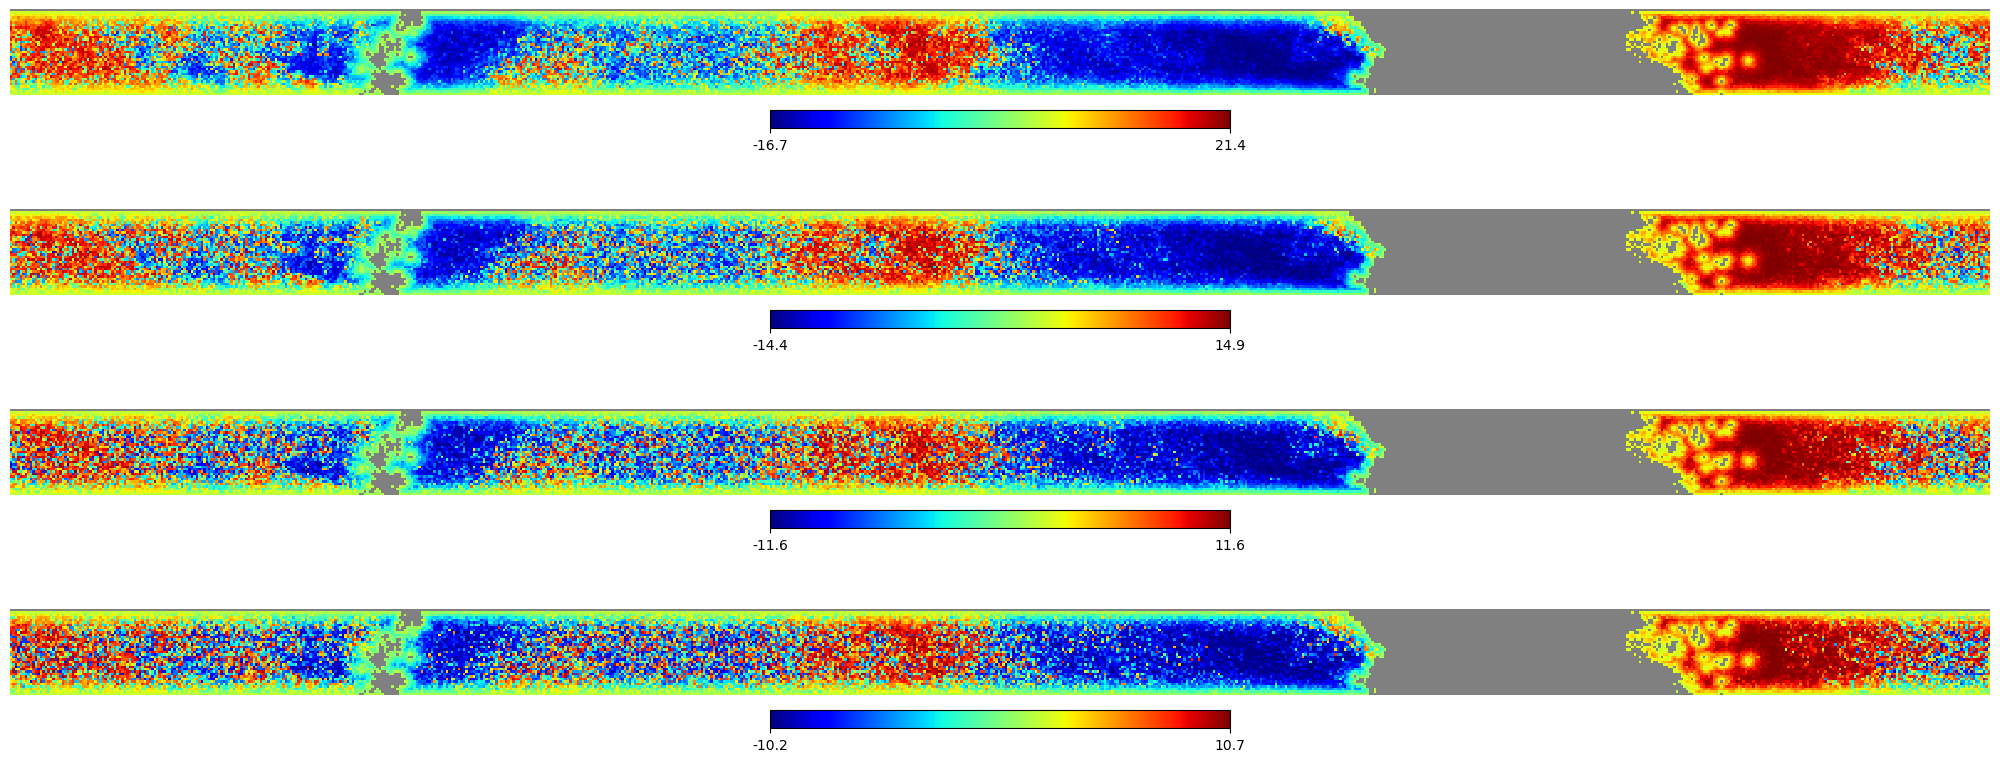

In [24]:
plt.figure(figsize=(20,8))
dec_min = -25.282 #from hitmap
dec_max =  -9.897
Dec_min = dec_min - 0.1
Dec_max = dec_max + 0.1
cmap    = "jet"

pos = [411,412,413,414]
ind = np.where(mask<=0)[0]
for i, (jmap, jpos) in enumerate(zip([imap[0],imap[10],imap[20], imap[29]],pos)):
    jmap = dcopy(jmap)
    jmap[ind]=hp.UNSEEN
    hp.cartview(jmap, norm="hist", unit=None,  latra=[Dec_min,Dec_max], cmap=cmap, title=None,  sub=jpos )

# PRIOR 2 : 